# Choosing a classification algorithm

No single classification algorithm works best across all possible scenarios. It is always recomended to try at least handful of algorithm before selecting best one. It depends upon the number of features, noise in the dataset and whether classes are linearly seperable or not.

#### Important
Steps involved in training a machine learning algorithm
1. Selection of features
2. Choosing a performance metric
3. Choosing a classifier and optimization algorithm
4. Evaluating the performance of the model
5. Tuning the algorithm



# Training a perceptron via scikit-learn

We will use Iris dataset for testing and experimenting with algorithms. We will use only two features from the Iris Flower dataset for visualization purposes.
We will use the petal length and petal width of the 150 flower samples to the feature matrix x and y as the corresponding flower species


In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris() # loading the iris dataset in the memory
X = iris.data[:,[2,3]] # Column 2 and 3 are petal length and petal width\
y = iris.target # lables are already encoded in 0,1,2, 0 - Setosa, 1 - Versicolor, 2 - Virginica

Always convert the class label to integers for the optimal performance of the algorithm as we done above example. if we do np.unique on class labels(y) it will return (0,1,2)
To evaluate how well algorithm is performing on unseen data we will split our data set in training and testing set. we can use sklearn module test_train_split to do that

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# This will split the 30 percent of the data for testing and 70 percent for training the algorithm
# random_state is used to produce the same dataset as of book

/home/mayank/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now we will do the feature scaling as we did for gradient descent. Here we will use the StandarScaler in-built function of sklearn to standardize the features

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # fit method calculates the mean and variance for each feature
X_train_std = sc.transform(X_train) # this transforms the features or standardized the features
X_test_std = sc.transform(X_test)


Now we can train our perceptron model. Most of the libraries on scikit-learn supports multiclass classification and default via ** One-vs-Rest or One-vs-all**  

### One-vs-all
This is technique which is used to extend the binary classifier to multiclass classifier. In this technique different classfier object is used to train on each class label. While training for particular class for example positive class we consider all other classes as zero. The one with high probablity is then choosen


In [4]:
# Training Perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40,eta0=0.1,random_state=0) # 40 Epochs or passes over training set and learning rate of 0.1
ppn.fit(X_train_std,y_train)# random state is used just to reprocduce the same training set after shuffling over each epoch

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

#### Finding the correct learning rate $\eta$ requires experimentation. If the learning rate is too large it will overshoot the global minimum. If the learning rate is too small it will take more epochs to converge.


In [5]:
# Predicting from perceptron
y_pred = ppn.predict(X_test_std)
print('Missclassified samples: %d'%(y_pred != y_test).sum())

Missclassified samples: 4


We have missclassified 4 samples out of 45 test samples. So missclassification error is $\frac{4}{45} \approx 0.089 = 8.9 percent$ 

Accuracy = 1 - missclassfication error = 1 - 0.089 = 91.1 percent

In [6]:
# Accuracy using inbuilt scikit-learn function
from sklearn.metrics import accuracy_score
print('Accuracy : %f'%accuracy_score(y_test,y_pred))

Accuracy : 0.911111


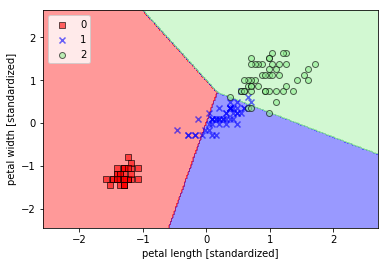

In [7]:
# Plotting descision bounday
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined_std,classifier=ppn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

We can see the three flowers are not perfectly seperated by a linear decision boundary (see the lines are staright ) Since we know that perceptron algorithm doesn't converge if the data can't be seperated by the linear boundary. Therefore, perceptron is not generally used.

# Logistic Regression

The biggest disadvantage of the perceptron is if data is not linearly seperable than algorithm will never converge even with low the learning rate.

### Intiuition

* Logistic regression is another linear model for binary classification which can be extended to multi class using 0vR technique.

#### Odds ratio

It is the odd in favor of particular event. The odds ration is written as $\frac{p}{(1-p)}$  where $ p $ is the probability of positive event. Here positive doesn't mean good it means probability of event we want to predict. For example the patient has certain disease can be positive event for us $ y =1 $. 

**Logit function** is log of odds ratio : $logit(p) = log\frac{p}{(1-p)}$ 

The logit function takes values from range of 0 to 1 and transforms it to entire real line number range, which can be used to represent linear relationship between feature values and log-odds

$logit(p(y=1|x)) = w_{0}x_{0} + w_{1}x_{1} + w_{m}x_{m} = w^{T}x$, Here $ p(y=1|x) $ is conditional probability of particular sample belongs to class 1 given its features x

We are actually interested in predicting the probabilty of particular sample belongs to particular class given its features, which is inverse of logit function (in logit function you enter probablity it gives you real number but we want probility if we input net input which is a real number). It is called *sigmoid* function.

### $\Phi (z) = \frac{1}{1+e^{-z}}$ 


### Plot of sigmoid function



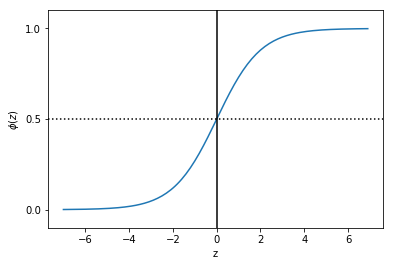

In [8]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=0.1,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

we can see we got a **S-Shaped** curve. $ \phi(z) $ approaches 1 if $z \rightarrow \infty$ , because $ e^{-z}$ becomes very small. Similarly, $ \phi(z) $ approaches 0 if $z \rightarrow 0$. Thus sigmoid function transforms a real number (input) to range [0,1] with an intercept at $ \phi(z) = 0.5$.

We can relate this to the previous adaline model, where activation function was identity, $\phi(z) = z$. Here it is replaced by sigmoid function. 

<img src="https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/ch03/images/03_03.png" alt="Annotation Examples" style="width:500px">

The output of the function is then interpreted as the probability of particular sample belongs to class 1 $ \phi(z) = P(y=1|x,w) $ given its features x and paramterized by weight vector. If the value is $ \phi(z) = 0.8 $, this means there are 80 percent chance that it belongs to the class 1 and 20 percent that it belongs to class 0. Then the probablity can be converted to binary outcome by quantizer

$y^{-} = \begin{cases} 1, & \text{ if } x= \phi(z) \geq 0.5\\ 0 & \text{ if } otherwise \end{cases}$ 

#### Note : Logistic regression not only predicts the class labels but it also predicts the probability of particular sample belongs to particular class. It is used in weather forecasting and predicting chance whether patient has a particular disease given symptoms. Thats why logistic regression enjoys wide popularity in the field of medicine

### Learning weights of logistic cost function

In previous topic we define the sum-squarred error cost function :

$J(w) = \sum_{i}\frac{1}{2}(\phi(z^{i}) - y^{i})^2$ 

We minimized this function to learn the optimal weights for Adaline Classification. To derive the cost function for logistic regression first define a likelihood function L we want to maximize when we build our model, **assuming that each sample in dataset are independent of each other**. The formula is as follows:

$L(w) = P(y|x;w) = \prod_{i}^{n}P(y^i|x^i;w) = (\phi(z^{i})^{y^{i}} - (1 - \phi(z^{i})))^{1-y^{i}}$, one of the term become 1 for other class. for example for y = 1 another term becomes unity

** first term is for y = 1 and second term is for y =0 **

In practice it is easier to minimize log function so taking log:

$l(w) = log L(w) = \sum_{i}^{n} log(\phi(z^{i})) + (1-y^{i})log(1-\phi(z^{i}))$ 

Lets write the log likelihood function as the cost function which can be minimized using gradient descent. 

$l(w) = log L(w) = \sum_{i}^{n} -log(\phi(z^{i})) - (1-y^{i})log(1-\phi(z^{i}))$ we are not writing $ y^{i} $ instead summation is used after taking log

for single sample instance, it becomes

$J(\phi(z),y;w) = -ylog(\phi(z)) - (1-y)log(1-\phi(z))$ , negative is added to minimize the log function easily

So the cost function for each class is 

$J(\phi(z),y;w) = \begin{cases} -log(\phi(z)) & \text{ if } y=1 \\ -log(1-\phi(z))& \text{ if } y=0 \end{cases}$ 


<img src="https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/ch03/images/03_04.png" alt="Annotation Examples" style="width:400px">

We can clearly see the cost function reaches to 0 if we correctly predict the class. However, if the prediction is wrong the cost goes towards infinity. **The moral is we penalize wrong predictions with an more larger cost.**


### Training a logistic cost function model with scikit - learn

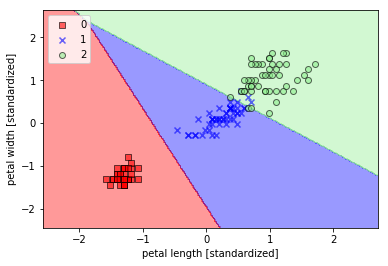

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined_std,classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Furthermore, we can predict the class probabilties for each class using predict_prob method.


In [10]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1)) # without reshape it generates valueError or Depriciation Warning

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

Preceeding array tells us that the model predicts 93.7 percent chance of sample belongs to Iris-Virginica and other classes probabloties as mentioned

### Calculation of gradient of cost function of logistic regression

The partial derivative of log-likelihood cost function with respect to the jth weight (feature is)

### $\frac{\partial l(w)}{\partial w_{j}} = (y\frac{1}{\phi(z)} - (1-y)\frac{1}{1-\phi(z)})\frac{\partial \phi(z)}{w_{j}}$ 

Partial derivative of sigmoid function

### $\frac{\partial \phi(z)}{w_{j}} = \frac{\partial }{\partial z}\frac{1}{1+e^{-z}} = \frac{1}{(1+e^{-z})^2}e^{-z} = \frac{1}{1+e^{-z}}(1-\frac{1}{1+e^{-z}}) = \phi(z)(1 - \phi(z))$ 

Using the partial derivative of sigmoid in second last equation

### $\frac{\partial l(w)}{\partial w_{j}} = (y\frac{1}{\phi(z)} - (1-y)\frac{1}{1-\phi(z)})\phi(z)(1 - \phi(z))\frac{\partial }{\partial w_{j}}z$ 

### $= (y(1-\phi(z)) - (1-y)\phi(z))x_{j} = (y - \phi(z))x_{j}$ 

our goal was to maximize the log-likelihood function so the weight update for each weights is as follows:

### $w_{j} = w_{j} + \eta \sum_{i=1}^{n}(y^{i} - \phi(z)^i)x^i$ 

so general weight update rule becomes :

### $w = w + \Delta w$ 

We define $ \Delta w$ as follows :

$ \Delta = \eta \bigtriangledown  l(w)$

# Tackling overfiting via regularization

Overfitting is common problem in machine learning where a model performs well on training data but doesn't perform well on unseen data(test data). If a model suffers from overfitting we can say that it has **high variance**, which can be caused by the model is too complex given the underlying data. If a model suffers from underfitting we can say that it has **high bias** which means it is not complex enough to capture all the patterns in the data and therefore performs poor on unseen data.

The problem of overfitting is best illustrated by the non-linear decision boundary as shown below:

<img src="https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/ch03/images/03_06.png" alt="Annotation Examples" style="width:500px">

1. Error Due to Bias : The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. So expection there is strange because we have only one model. Assume you train your algorithm on data number of times then due to randomness in the data you will get the range of prediction for a sample so expection is used for that. **Bias represent in general how far your are your model predictions from the actual correct value. High means you are too far from the correct prediction**

2. Error due to variance : The error due to variance is taken variablilty of the model prediction from a data point. If you train your model multiple of time. Then Variance represent how much your prediction for a given point vary for different realizations of the model

One way to find a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is a very useful method to filter out noise from the data and eventually prevent overfitting. The concept behind the over-fitting is to add additional information (bias) to penalize extreme parameter weights. The most common form of regularization is **L2-regularization** which can be written as :

### L2- Regularization : $\frac{\lambda }{2}\left \| w \right \|^{2} = \frac{\lambda}{2}\sum_{j=1}^{m}w_{j}^{2}$ , where $ \lambda $ is called regularization parameter. 

** Regularization is another important reason why feature scaling is useful. For regularization to work the features should be on same comparable scale **

To apply regularization add the regularization term to the cost function to shirnk the weights.

$J(w) = \sum_{i=1}^{n}(-log(\phi(z^{i})) + (1-y^{i})(-log(1-\phi(z^{i})))) + \frac{\lambda}{2}\left \| w \right \|^{2}$ 

**Via $\lambda$ we can control how well we fit the training data while keeping the weights small**. By the increasing the value to $\lambda$ we increase the regularization strength and decrease the weights. ** C is directly related to the $\lambda$ **

### C is inverse of regularization strength : $ C = \frac{1}{\lambda} $

Then we can write the regularized cost functions as :

$J(w) = C(\sum_{i=1}^{n}(-log(\phi(z^{i})) + (1-y^{i})(-log(1-\phi(z^{i}))))) + \frac{1}{2}\left \| w \right \|^{2}$

Decreasing the value of the inverse regularization parameter C means that we are increasing the regularization strength, which we can visualize by plotting the L2 regularization path for the two weight cofficients.



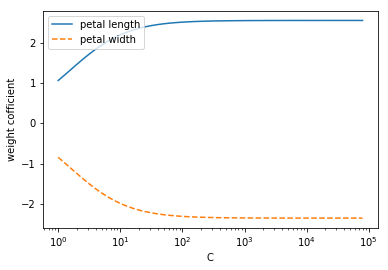

In [44]:
weights, param = [], []
for c in np.arange(0.0001,5,0.1):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1]) # get weights cofficients for the class 2
    param.append(10**c)
weights = np.array(weights)
plt.plot(param,weights[:,0],label='petal length')
plt.plot(param,weights[:,1],label='petal width',linestyle='--')
plt.ylabel('weight cofficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

We colleced the weight cofficients of class 2 vs all classifier. We used OvR technique for classification. We can see in the plot that if we decrease the value of C that is increase the regularization strength the weight cofficients shrink. 

**Note : On increasing the value of C(decreasing the regularization strength) we increase the bias and lower the variance.**

# Maximum Margin Classification using Support Vector Machines

Another power widely used classification algorithm is support vector machines, which can be considered as the extension of the perceptron algorithm. In perceptron algorithm we minimized the missclassification errors(our cost function was predict_value - actual value we minimized this). In SVMs our objective is to maximize the margin. The margin is defined as the distance between **hyperplane(decision boundary)** and training sample closest to this hyperplane. This training samples are called as **support vector**. 

<img src="https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/ch03/images/03_07.png", style="width:600px">

### Maximum margin intuition

**Very Imp.** : **The rationale behind having decision boundary with large margin is that they are tend to have a low generalization errors whereas the models with small margins are more prone to overfitting.**

To get the intuition of maximum margin have a look at *positive and *negative hyperplanes that are parllel to decision boundary. 

for positive hyperplane:

$w_{0} + w^{T}x_{positive} = 1$ , here the $ w^{T}x_{positive}$ means the value after activation function, rememeber perceptron has identity as activation function and for zeroth weight x is always 1.

for negative hyperplane:
$w_{0} + w^{T}x_{negative} = -1$

If we subtract above two equations we get

$\Rightarrow w^{T}(x_{positive} - x_{negative}) = 2$ 

We can normalize this by the length of the vector w, which is defined as :

$\left \| w \right \| = \sqrt{\sum_{j=1}^{m}w^{2}_{j}}$ 

So, final equation becomes

$\frac{w_{T}(x_{pos}-x_{neg})}{\left \| w \right \|} = \frac{2}{\left \| w \right \|}$ 

The left side of the preceding eqaution can be interpreted as the distance between the positive and negative hyperplanes, which is so called **margin** we want to maximize. So, our objective becomes to maximize this margin by maximizing the $\frac{2}{{\left \| w \right \|}}$ under the constraint that the samples are classified correctly. 

That is :

1. $w_{0} + w^{T}x^{i} \geq 1 $ if $y^{i} = 1$ 

2. $w_{0} + w^{T}x^{i} < -1 $ if $y^{i} = -1$ 

These two equations says that all the positive sample should fall behind the positive hyperplane and all negative samples should lie before the negative hyperplane. Or more simply if our net input after identity net function is greater than or equal to one it belongs to positive class else to negative class.In more compact form it can be written as :

$y^{i}(w_{0} + w^{T}x^{i})\geq 1\forall _{i}$ , Now reciprocal term $\frac{1}{2} \left \| w \right \|$ can minimized more easily using quadratic programming.

### Dealing with nonlinearly seperable case using slack variables

We don't dive more into the SVMs maths but lets understand slack variable $\xi$. This led to the soft-margin classification. The reason behind introducing slack variable was that the linear constraints need to be relaxed for nonlinearly seperable data to allow convergence of the optimization in the presence of missclassfication. The linear equation can be changed easily.

1. $w_{0} + w^{T}x^{i} \geq 1 $ if $y^{i} = 1-\xi^{i}$ 

2. $w_{0} + w^{T}x^{i} < -1 $ if $y^{i} = 1+\xi^{i}$ 

So the new objective to be minimized becomes.

$\Rightarrow \frac{1}{2}\left \| w \right \|^{2} + C(\sum_{i}\xi ^{i})$ 

** Using the value of C we can control the penalty for misclassification.** Large value of C correspond to large error penalties whereas we are less strict about misclassification for lower value of C. **We can use the C to control the width of the margin and tune bias-variance trade-off. Here on increasing the value of C we lower the bias and increase the variance. We can see below in image also.**

<img src="https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/ch03/images/03_08.png", style="width:500px">